## Importing libraries

In [224]:
import numpy as np
from decimal import Decimal
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import re
from sklearn.ensemble import RandomForestClassifier

## Load the dataset

In [4]:
import pandas as pd
sw_deals = pd.read_excel("../Downloads/IBM_CAO_Data_Science_Challenge_2022-2023.xlsx", sheet_name = "Table1-SW Deals")


In [5]:
comments = pd.read_excel("../Downloads/IBM_CAO_Data_Science_Challenge_2022-2023.xlsx", sheet_name = "Tabel2-SW Deals Comments")


In [6]:
sw_deals

,PROD_CATEGORY,WEB_QUOTE_NUM,CUSTOMER_NUM,WON,CNTRY_CODE,PART_NUM,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,SUBMIT_DATE,EXCHANGE_RATE,CURRNCY_CODE,START_DATE,END_DATE,INDUSTRY_CODE,SUBMIT_YR,INDUSTRY_DESC
0,SSW,18635421,3001131,0,CAN,DJE0WLL,1,13796.623177,13796.623177,2021-02-04 17:04:11,0.76746,CAD,2021-02-04 00:00:00,2022-02-28 00:00:00,28,2021,Government
1,SSW,18635421,3001131,0,CAN,DNE0HLL,1,2079.815810,2079.815810,2021-02-04 17:04:11,0.76746,CAD,2021-02-04 00:00:00,2022-02-28 00:00:00,28,2021,Government
2,SSW,15548827,3010226,1,CAN,DB71ALL,1,12667.152724,18095.932464,2021-09-28 10:43:44,0.76746,CAD,2021-09-28 00:00:00,2022-09-30 00:00:00,28,2021,Government
3,SSW,1000003132,3010226,1,CAN,DB71ALL,1,12667.152724,18095.932464,2021-10-29 16:54:27,0.76746,CAD,2021-10-29 00:00:00,2022-10-31 00:00:00,28,2021,Government
4,SSW,1010057574,3010226,1,CAN,DAW0YLL,1,15958.756715,20055.257099,2021-11-29 14:43:41,0.76746,CAD,2021-12-03 00:00:00,2022-12-31 00:00:00,28,2021,Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478603,SaaS,1090085270,3834732,0,CAN,D8Q1GLL,3,29.928960,31.504128,2022-05-17 00:00:00,0.76800,CAD,2022-05-17 14:57:45,2022-07-17 10:57:45,34,2022,Small And Medium Business
478604,SaaS,1090085270,3834732,0,CAN,D8Q1DLL,1,1596.510720,1680.537600,2022-05-17 00:00:00,0.76800,CAD,2022-05-17 14:57:45,2022-07-17 10:57:45,34,2022,Small And Medium Business
478605,SaaS,1090085351,3663450,0,CAN,DEM0TLL,3,22645.647360,22645.647360,2022-05-17 00:00:00,0.76800,CAD,2017-10-01 00:00:00,2020-09-30 00:00:00,34,2022,Small And Medium Business
478606,SaaS,1090085351,3663450,0,CAN,DEM0TLL,10,8382.535680,10160.649216,2022-05-17 00:00:00,0.76800,CAD,2022-05-17 15:22:52,2022-09-16 07:22:52,34,2022,Small And Medium Business


In [239]:
comments["CMMT_TYPE"].unique()

array(['COMP_NAME'], dtype=object)

In [8]:
sw_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478608 entries, 0 to 478607
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PROD_CATEGORY   478608 non-null  object        
 1   WEB_QUOTE_NUM   478608 non-null  int64         
 2   CUSTOMER_NUM    478608 non-null  object        
 3   WON             478608 non-null  int64         
 4   CNTRY_CODE      478608 non-null  object        
 5   PART_NUM        478608 non-null  object        
 6   PART_QTY        478608 non-null  int64         
 7   QUOTE_PRICE     478608 non-null  float64       
 8   ENTITLED_PRICE  478608 non-null  float64       
 9   SUBMIT_DATE     478608 non-null  datetime64[ns]
 10  EXCHANGE_RATE   478608 non-null  float64       
 11  CURRNCY_CODE    478608 non-null  object        
 12  START_DATE      478608 non-null  datetime64[ns]
 13  END_DATE        478608 non-null  datetime64[ns]
 14  INDUSTRY_CODE   478608 non-null  obj

In [9]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75103 entries, 0 to 75102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   WEB_QUOTE_NUM  75103 non-null  int64         
 1   CMMT_TYPE      75103 non-null  object        
 2   COMMENT        75103 non-null  object        
 3   ADD_DATE       75103 non-null  datetime64[ns]
 4   MOD_DATE       75103 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 2.9+ MB


### <span style='color:green'> -> No null values </span>

In [11]:
joined = sw_deals.merge(comments, how='left', on = "WEB_QUOTE_NUM")
joined.isnull().sum()

PROD_CATEGORY          0
WEB_QUOTE_NUM          0
CUSTOMER_NUM           0
WON                    0
CNTRY_CODE             0
PART_NUM               0
PART_QTY               0
QUOTE_PRICE            0
ENTITLED_PRICE         0
SUBMIT_DATE            0
EXCHANGE_RATE          0
CURRNCY_CODE           0
START_DATE             0
END_DATE               0
INDUSTRY_CODE          0
SUBMIT_YR              0
INDUSTRY_DESC          0
CMMT_TYPE         457344
COMMENT           457344
ADD_DATE          457344
MOD_DATE          457344
dtype: int64

In [12]:
joined

,PROD_CATEGORY,WEB_QUOTE_NUM,CUSTOMER_NUM,WON,CNTRY_CODE,PART_NUM,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,SUBMIT_DATE,...,CURRNCY_CODE,START_DATE,END_DATE,INDUSTRY_CODE,SUBMIT_YR,INDUSTRY_DESC,CMMT_TYPE,COMMENT,ADD_DATE,MOD_DATE
0,SSW,18635421,3001131,0,CAN,DJE0WLL,1,13796.623177,13796.623177,2021-02-04 17:04:11,...,CAD,2021-02-04 00:00:00,2022-02-28 00:00:00,28,2021,Government,NaN,NaN,NaT,NaT
1,SSW,18635421,3001131,0,CAN,DNE0HLL,1,2079.815810,2079.815810,2021-02-04 17:04:11,...,CAD,2021-02-04 00:00:00,2022-02-28 00:00:00,28,2021,Government,NaN,NaN,NaT,NaT
2,SSW,15548827,3010226,1,CAN,DB71ALL,1,12667.152724,18095.932464,2021-09-28 10:43:44,...,CAD,2021-09-28 00:00:00,2022-09-30 00:00:00,28,2021,Government,NaN,NaN,NaT,NaT
3,SSW,1000003132,3010226,1,CAN,DB71ALL,1,12667.152724,18095.932464,2021-10-29 16:54:27,...,CAD,2021-10-29 00:00:00,2022-10-31 00:00:00,28,2021,Government,NaN,NaN,NaT,NaT
4,SSW,1010057574,3010226,1,CAN,DAW0YLL,1,15958.756715,20055.257099,2021-11-29 14:43:41,...,CAD,2021-12-03 00:00:00,2022-12-31 00:00:00,28,2021,Government,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478603,SaaS,1090085270,3834732,0,CAN,D8Q1GLL,3,29.928960,31.504128,2022-05-17 00:00:00,...,CAD,2022-05-17 14:57:45,2022-07-17 10:57:45,34,2022,Small And Medium Business,NaN,NaN,NaT,NaT
478604,SaaS,1090085270,3834732,0,CAN,D8Q1DLL,1,1596.510720,1680.537600,2022-05-17 00:00:00,...,CAD,2022-05-17 14:57:45,2022-07-17 10:57:45,34,2022,Small And Medium Business,NaN,NaN,NaT,NaT
478605,SaaS,1090085351,3663450,0,CAN,DEM0TLL,3,22645.647360,22645.647360,2022-05-17 00:00:00,...,CAD,2017-10-01 00:00:00,2020-09-30 00:00:00,34,2022,Small And Medium Business,NaN,NaN,NaT,NaT
478606,SaaS,1090085351,3663450,0,CAN,DEM0TLL,10,8382.535680,10160.649216,2022-05-17 00:00:00,...,CAD,2022-05-17 15:22:52,2022-09-16 07:22:52,34,2022,Small And Medium Business,NaN,NaN,NaT,NaT


## EDA

In [14]:
sw_deals.describe()

,WEB_QUOTE_NUM,WON,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,EXCHANGE_RATE,SUBMIT_YR
count,4.786080e+05,478608.000000,4.786080e+05,4.786080e+05,4.786080e+05,478608.00000,478608.000000
mean,1.668992e+08,0.519707,4.731914e+04,7.389219e+04,6.931678e+05,0.97557,2020.096398
std,3.668802e+08,0.499612,6.437065e+06,2.677050e+06,5.050222e+07,0.06883,0.986004
min,8.009760e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.76746,2019.000000
25%,1.281187e+07,0.000000,1.000000e+00,1.200000e+03,1.833360e+03,1.00000,2019.000000
50%,1.581512e+07,1.000000,9.000000e+00,5.617700e+03,8.550000e+03,1.00000,2020.000000
75%,1.873137e+07,1.000000,1.500000e+02,2.414549e+04,4.025000e+04,1.00000,2021.000000
max,1.110033e+09,1.000000,1.000000e+09,5.846750e+08,1.882648e+10,1.00000,2022.000000


In [237]:
sw_deals["WON"].value_counts()

1    248736
0    229872
Name: WON, dtype: int64

### <span style='color:green'> -> Classes are balanced </span>

In [15]:
sw_deals.isnull().sum()

PROD_CATEGORY     0
WEB_QUOTE_NUM     0
CUSTOMER_NUM      0
WON               0
CNTRY_CODE        0
PART_NUM          0
PART_QTY          0
QUOTE_PRICE       0
ENTITLED_PRICE    0
SUBMIT_DATE       0
EXCHANGE_RATE     0
CURRNCY_CODE      0
START_DATE        0
END_DATE          0
INDUSTRY_CODE     0
SUBMIT_YR         0
INDUSTRY_DESC     0
dtype: int64

### <span style='color:black'> Function used for feature engineering </span>

### <span style='color:green'> Assumption: Industry codes aren't ordinal </span>

In [192]:
def getYear(date):
    return pd.to_datetime(date).year
def getMonth(date):
    return pd.to_datetime(date).month
def getDayofYear(date):
    return pd.to_datetime(date).day_of_year
def getEncoding(column_value, given_value):
    return int(column_value==given_value)
def breakDownCompanies(comment):
    if(pd.isnull(comment)):
        return 0
    comment = comment.replace("and", "&")
    comment = comment.replace("AND", "&")
    comment = re.split(', |&|-|;|/|\+', comment)
    return len(comment)
def commentCount(comment):
    if(pd.isnull(comment)):
        return 0
    else:
        return 1

### Tranforming date data

In [17]:
#sw_deals["Submit_Date_Year"] = sw_deals["SUBMIT_DATE"].apply(getYear)
sw_deals["Submit_Date_Month"] = sw_deals["SUBMIT_DATE"].apply(getMonth)
sw_deals["Submit_Date_DayOfYear"] = sw_deals["SUBMIT_DATE"].apply(getDayofYear)
sw_deals["Start_Date_Year"] = sw_deals["START_DATE"].apply(getYear)
sw_deals["Start_Date_Month"] = sw_deals["START_DATE"].apply(getMonth)
sw_deals["Start_Date_DayOfYear"] = sw_deals["START_DATE"].apply(getDayofYear)
sw_deals["End_Date_Year"] = sw_deals["END_DATE"].apply(getYear)
sw_deals["End_Date_Month"] = sw_deals["END_DATE"].apply(getMonth)
sw_deals["End_Date_DayOfYear"] = sw_deals["END_DATE"].apply(getDayofYear)

### One hot Encoding industries and product categories

In [18]:
industries = sw_deals["INDUSTRY_DESC"].unique()
for industry in industries:
    sw_deals[industry] = sw_deals["INDUSTRY_DESC"].apply(getEncoding,  args = (industry,))

In [19]:
productCats = sw_deals["PROD_CATEGORY"].unique()
for productCat in productCats:
    sw_deals[productCat] = sw_deals["PROD_CATEGORY"].apply(getEncoding,  args = (productCat,))

In [20]:
for column in "CNTRY_CODE","CURRNCY_CODE":
    column_values = sw_deals[column].unique()
    for column_value in column_values:
        sw_deals[column_value] = sw_deals[column].apply(getEncoding,  args = (column_value,))

In [21]:
sw_deals

,PROD_CATEGORY,WEB_QUOTE_NUM,CUSTOMER_NUM,WON,CNTRY_CODE,PART_NUM,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,SUBMIT_DATE,...,Electronics,BP Activity end user not known,SSW,SnS Renew,SaaS,Subscription,CAN,USA,CAD,USD
0,SSW,18635421,3001131,0,CAN,DJE0WLL,1,13796.623177,13796.623177,2021-02-04 17:04:11,...,0,0,1,0,0,0,1,0,1,0
1,SSW,18635421,3001131,0,CAN,DNE0HLL,1,2079.815810,2079.815810,2021-02-04 17:04:11,...,0,0,1,0,0,0,1,0,1,0
2,SSW,15548827,3010226,1,CAN,DB71ALL,1,12667.152724,18095.932464,2021-09-28 10:43:44,...,0,0,1,0,0,0,1,0,1,0
3,SSW,1000003132,3010226,1,CAN,DB71ALL,1,12667.152724,18095.932464,2021-10-29 16:54:27,...,0,0,1,0,0,0,1,0,1,0
4,SSW,1010057574,3010226,1,CAN,DAW0YLL,1,15958.756715,20055.257099,2021-11-29 14:43:41,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478603,SaaS,1090085270,3834732,0,CAN,D8Q1GLL,3,29.928960,31.504128,2022-05-17 00:00:00,...,0,0,0,0,1,0,1,0,1,0
478604,SaaS,1090085270,3834732,0,CAN,D8Q1DLL,1,1596.510720,1680.537600,2022-05-17 00:00:00,...,0,0,0,0,1,0,1,0,1,0
478605,SaaS,1090085351,3663450,0,CAN,DEM0TLL,3,22645.647360,22645.647360,2022-05-17 00:00:00,...,0,0,0,0,1,0,1,0,1,0
478606,SaaS,1090085351,3663450,0,CAN,DEM0TLL,10,8382.535680,10160.649216,2022-05-17 00:00:00,...,0,0,0,0,1,0,1,0,1,0


### 1.1 Across all sales deals, which product type contributes the biggest revenue in 2021? Assume that for any deal, revenue is generated for the year when the deal is submitted.!

In [268]:
sw_deals2021 = sw_deals[sw_deals["SUBMIT_YR"]==2021]

In [269]:
sw_deals2021["PART_QTY"].value_counts()
#No need to adjust for the unlimited subscitpions 9999999 value given value counts

1        32914
2         8786
3         4584
4         3773
5         3691
         ...  
1381         1
27682        1
747          1
998          1
12352        1
Name: PART_QTY, Length: 3617, dtype: int64

In [24]:
sw_deals2021["revenue"] = sw_deals2021["PART_QTY"]*sw_deals2021["QUOTE_PRICE"]

/var/folders/k_/ppnmkyj13nvc74dj067xh0m40000gn/T/ipykernel_72923/165790806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_deals2021["revenue"] = sw_deals2021["PART_QTY"]*sw_deals2021["QUOTE_PRICE"]


In [25]:
sw_deals2021

,PROD_CATEGORY,WEB_QUOTE_NUM,CUSTOMER_NUM,WON,CNTRY_CODE,PART_NUM,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,SUBMIT_DATE,...,BP Activity end user not known,SSW,SnS Renew,SaaS,Subscription,CAN,USA,CAD,USD,revenue
0,SSW,18635421,3001131,0,CAN,DJE0WLL,1,1.379662e+04,1.379662e+04,2021-02-04 17:04:11,...,0,1,0,0,0,1,0,1,0,1.379662e+04
1,SSW,18635421,3001131,0,CAN,DNE0HLL,1,2.079816e+03,2.079816e+03,2021-02-04 17:04:11,...,0,1,0,0,0,1,0,1,0,2.079816e+03
2,SSW,15548827,3010226,1,CAN,DB71ALL,1,1.266715e+04,1.809593e+04,2021-09-28 10:43:44,...,0,1,0,0,0,1,0,1,0,1.266715e+04
3,SSW,1000003132,3010226,1,CAN,DB71ALL,1,1.266715e+04,1.809593e+04,2021-10-29 16:54:27,...,0,1,0,0,0,1,0,1,0,1.266715e+04
4,SSW,1010057574,3010226,1,CAN,DAW0YLL,1,1.595876e+04,2.005526e+04,2021-11-29 14:43:41,...,0,1,0,0,0,1,0,1,0,1.595876e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477789,SaaS,1020091438,7788141,0,CAN,DQP0ILL,3,1.908818e+03,1.908818e+03,2021-12-23 00:00:00,...,0,0,0,1,0,1,0,1,0,5.726454e+03
477790,SaaS,1020091438,7788141,0,CAN,DQP0JLL,5,6.363648e+02,6.363648e+02,2021-12-23 00:00:00,...,0,0,0,1,0,1,0,1,0,3.181824e+03
477791,SaaS,1030012968,7021237,1,CAN,D5X11LL,50,2.143710e+04,2.749121e+04,2021-12-28 00:00:00,...,0,0,0,1,0,1,0,1,0,1.071855e+06
477792,SaaS,1030013732,3130927,1,CAN,D540ZZX,40,1.780029e+06,6.339133e+06,2021-12-28 00:00:00,...,0,0,0,1,0,1,0,1,0,7.120115e+07


In [26]:
groupedByProductType = sw_deals2021.groupby("PROD_CATEGORY").sum()
groupedByProductType.sort_values(by = "revenue", ascending= False)

,WEB_QUOTE_NUM,WON,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,EXCHANGE_RATE,SUBMIT_YR,Submit_Date_Month,Submit_Date_DayOfYear,Start_Date_Year,...,BP Activity end user not known,SSW,SnS Renew,SaaS,Subscription,CAN,USA,CAD,USD,revenue
PROD_CATEGORY,,,,,,,,,,,,,,,,,,,,,
SnS Renew,18206790616818,42203,122833925,5.279211e+09,1.014862e+10,76944.304000,160311783,537792,15164474,160348347,...,0,0,79323,0,0,10277,69046,10253,69070,4.318977e+14
SaaS,4501376085402,17116,3075919793,1.613708e+09,1.768595e+10,24629.442000,50872612,160604,4497278,50873486,...,0,0,0,25172,0,2359,22813,2345,22827,1.504498e+14
SSW,2150360736430,5327,5024754,9.661308e+08,3.571163e+09,10972.655411,22899951,73388,2058669,22900000,...,0,11331,0,0,0,1544,9787,1541,9790,5.457636e+12
Subscription,686453974846,1135,1248533,1.113450e+09,5.119004e+09,2862.984000,5909404,20405,577781,5909460,...,0,0,0,0,2924,263,2661,263,2661,2.325692e+12


### <span style='color:green'>  SnS Renew product type contributes the biggest revenue in 2021, SaaS is close </span>

### 1.2 Investigating the most significant drivers for a deal’s  win or loss. 

### Correlation of existing features

In [29]:
corr_old_features = sw_deals[['PROD_CATEGORY', 'WON', 'CNTRY_CODE',
       'PART_QTY', 'QUOTE_PRICE', 'ENTITLED_PRICE',
       'EXCHANGE_RATE', 'CURRNCY_CODE','SUBMIT_YR']].corr()

<AxesSubplot:>

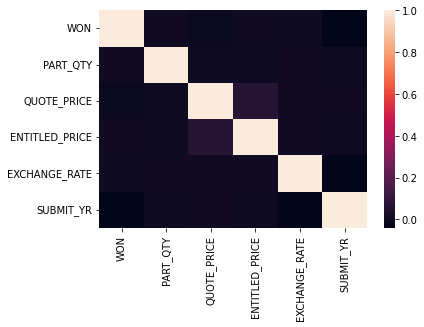

In [30]:
sns.heatmap(corr_old_features)

### Correlation of existing and new features


In [31]:
corr_new_features = sw_deals[['PROD_CATEGORY', 'WON', 'CNTRY_CODE',
       'PART_QTY', 'QUOTE_PRICE', 'ENTITLED_PRICE',
       'EXCHANGE_RATE', 'CURRNCY_CODE','SUBMIT_YR', 'Submit_Date_Month',
       'Start_Date_Year', 'Start_Date_Month', 'Start_Date_DayOfYear',
       'End_Date_Year', 'End_Date_Month', 'End_Date_DayOfYear', 'Government',
       'Healthcare', 'Small And Medium Business', 'Education', 'Banking',
       'Unassigned', 'Commercial', 'To Be Assigned', 'Travel & Transportation',
       'Computer Services', 'Media And Entertainment',
       'Computer Integrated Systems Design', 'Aerospace And Defense',
       'Energy & Utilities', 'Consumer Packaged Goods', 'Industrial Products',
       'Insurance', 'Chemical And Petroleum', 'Retail', 'Telecommunications',
       'Life Science Industries', 'Financial Markets', 'Automotive',
       'Electronics', 'BP Activity end user not known', 'SSW', 'SnS Renew',
       'SaaS', 'Subscription', 'CAN', 'USA', 'CAD', 'USD',
       'Submit_Date_DayOfYear']].corr()

<AxesSubplot:>

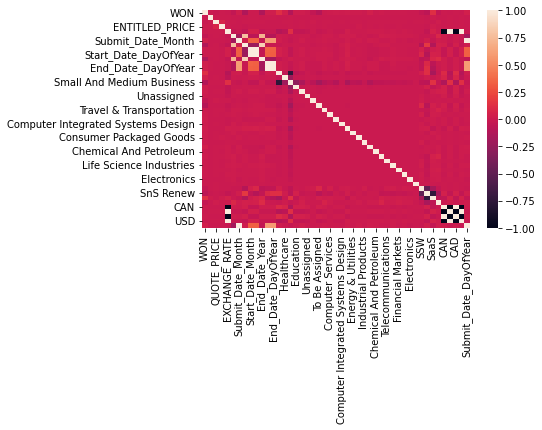

In [32]:
sns.heatmap(corr_new_features)

In [33]:
corr_new_features = sw_deals[['WON',
       'PART_QTY', 'QUOTE_PRICE', 'ENTITLED_PRICE',
       'EXCHANGE_RATE','SUBMIT_YR'
, 'Submit_Date_Month',
       'Start_Date_Year', 'Start_Date_Month', 'Start_Date_DayOfYear',
       'End_Date_Year', 'End_Date_Month', 'End_Date_DayOfYear', 'SSW', 'SnS Renew',
       'SaaS', 'Subscription', 'CAN', 'USA', 'CAD', 'USD',
       'Submit_Date_DayOfYear']].corr()

<AxesSubplot:>

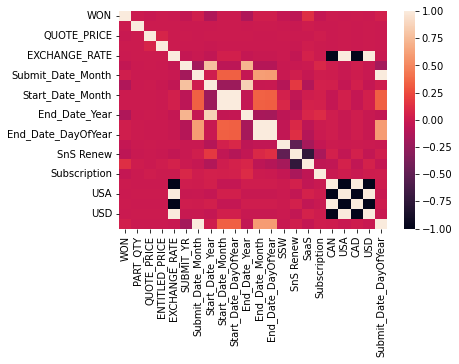

In [34]:
sns.heatmap(corr_new_features)

### Correlations with Win/Loss

                            WON
WON                    1.000000
PART_QTY               0.004552
QUOTE_PRICE           -0.014155
ENTITLED_PRICE         0.003909
EXCHANGE_RATE         -0.000752
SUBMIT_YR             -0.039779
Submit_Date_Month      0.029881
Start_Date_Year       -0.128013
Start_Date_Month       0.003589
Start_Date_DayOfYear   0.005349
End_Date_Year         -0.133478
End_Date_Month         0.030162
End_Date_DayOfYear     0.031026
SSW                   -0.037850
SnS Renew             -0.070119
SaaS                   0.118398
Subscription          -0.032758
CAN                    0.000313
USA                   -0.000313
CAD                    0.000526
USD                   -0.000526
Submit_Date_DayOfYear  0.031386


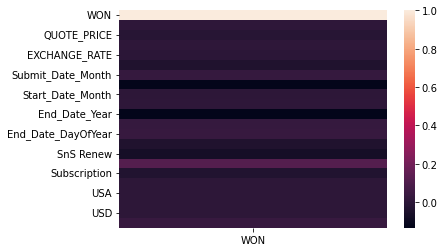

In [35]:
sns.heatmap(corr_new_features[["WON"]])
print((corr_new_features[["WON"]]))

### <span style='color:green'> -> No strong correlations  </span>


### Preprocessing

In [270]:
sw_numeric_columns = list(['WON','PART_QTY', 'QUOTE_PRICE', 'ENTITLED_PRICE',
       'EXCHANGE_RATE','SUBMIT_YR', 'Submit_Date_Month',
       'Start_Date_Year', 'Start_Date_Month', 'Start_Date_DayOfYear',
       'End_Date_Year', 'End_Date_Month', 'End_Date_DayOfYear', 'Government',
       'Healthcare', 'Small And Medium Business', 'Education', 'Banking',
       'Unassigned', 'Commercial', 'To Be Assigned', 'Travel & Transportation',
       'Computer Services', 'Media And Entertainment',
       'Computer Integrated Systems Design', 'Aerospace And Defense',
       'Energy & Utilities', 'Consumer Packaged Goods', 'Industrial Products',
       'Insurance', 'Chemical And Petroleum', 'Retail', 'Telecommunications',
       'Life Science Industries', 'Financial Markets', 'Automotive',
       'Electronics', 'BP Activity end user not known', 'SSW', 'SnS Renew',
       'SaaS', 'Subscription', 'CAN', 'USA', 'CAD', 'USD',
       'Submit_Date_DayOfYear'])
sw_numeric = sw_deals[sw_numeric_columns]                                                                    
                                                                         

### Scaling

In [39]:
sw_numeric_transformed_data = pd.DataFrame()
for column in sw_numeric_columns:
    sw_numeric_transformed_data[column] = (sw_numeric[column] - sw_numeric[column].min()) / (sw_numeric[column].max() - sw_numeric[column].min())    
  

In [40]:
sw_numeric_transformed_data

,WON,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,EXCHANGE_RATE,SUBMIT_YR,Submit_Date_Month,Start_Date_Year,Start_Date_Month,Start_Date_DayOfYear,...,BP Activity end user not known,SSW,SnS Renew,SaaS,Subscription,CAN,USA,CAD,USD,Submit_Date_DayOfYear
0,0.0,1.000000e-09,2.359708e-05,7.328309e-07,0.000000,0.666667,0.090909,0.636364,0.090909,0.093151,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.093151
1,0.0,1.000000e-09,3.557217e-06,1.104729e-07,0.000000,0.666667,0.090909,0.636364,0.090909,0.093151,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.093151
2,1.0,1.000000e-09,2.166529e-05,9.611959e-07,0.000000,0.666667,0.727273,0.636364,0.727273,0.739726,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.739726
3,1.0,1.000000e-09,2.166529e-05,9.611959e-07,0.000000,0.666667,0.818182,0.636364,0.818182,0.824658,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.824658
4,1.0,1.000000e-09,2.729509e-05,1.065269e-06,0.000000,0.666667,0.909091,0.636364,1.000000,0.920548,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.909589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478603,0.0,3.000000e-09,5.118905e-08,1.673395e-09,0.002323,1.000000,0.363636,0.727273,0.363636,0.372603,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.372603
478604,0.0,1.000000e-09,2.730595e-06,8.926458e-08,0.002323,1.000000,0.363636,0.727273,0.363636,0.372603,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.372603
478605,0.0,3.000000e-09,3.873203e-05,1.202862e-06,0.002323,1.000000,0.363636,0.272727,0.818182,0.747945,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.372603
478606,0.0,1.000000e-08,1.433709e-05,5.397000e-07,0.002323,1.000000,0.363636,0.727273,0.363636,0.372603,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.372603


In [263]:
X = sw_numeric_transformed_data[sw_numeric_columns[1:]]
Y = sw_numeric_transformed_data[["WON"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
LogisticModel = LogisticRegressionCV(cv=10).fit(X_train, y_train)

y_pred = LogisticModel.predict(X_test)
print(LogisticModel.coef_)
print(roc_auc_score(Y, LogisticModel.predict(X)))

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

[[ 3.72647935e-01 -1.74820663e+00  1.32373781e-01 -1.55493626e+00
   1.30719663e+00 -3.94950391e-01 -3.18718862e+00  2.22851347e+00
  -2.80149725e+00 -2.61689293e+00 -1.10109024e+01  1.18898830e+01
   6.00154085e-01  5.54732994e-01 -2.80650403e-01  2.53682334e-01
   2.64070505e-01  2.68671589e-02 -2.51009773e+00 -3.64262833e+00
  -5.84509528e-02  5.72968024e-01  2.27852412e-01  1.42230097e+00
   7.41843716e-01  3.09913539e-01  3.77977426e-01  5.38267227e-01
   8.68968803e-01  3.33902480e-01  5.08735628e-01 -2.05323676e-01
   2.17923344e-01 -9.39801795e-02 -1.65981803e-03 -6.90018384e-01
  -2.01481072e-01 -2.79037619e-01 -2.80704989e-01  9.12292166e-01
  -2.16679454e-01 -3.09251360e-01  4.45121464e-01 -3.10644574e-01
   4.46514679e-01  1.07900447e+00]]
0.6273254215619455


In [271]:
print(roc_auc_score(y_test, LogisticModel.predict(X_test)))

0.6296254278284912


### <span style='color:red'> ->Underfitting </span>


### Sorted drivers from logistic regression

In [258]:
drivers_logistic = dict(zip(sw_numeric_columns[1:], abs(LogisticModel.coef_[0])))
drivers_logistic
sorted_drivers_logistic = sorted(drivers_logistic.items(), key=lambda x: x[1], reverse=True)
sorted_drivers_logistic

[('End_Date_DayOfYear', 11.985069470154356),
 ('End_Date_Month', 11.096061168515005),
 ('To Be Assigned', 3.6511880046989846),
 ('Start_Date_Year', 3.1269973273560328),
 ('Start_Date_DayOfYear', 2.8244456488398604),
 ('End_Date_Year', 2.628367926565407),
 ('Commercial', 2.5470405410018278),
 ('Start_Date_Month', 2.254472760046853),
 ('EXCHANGE_RATE', 1.8397673401910604),
 ('QUOTE_PRICE', 1.8243999655024283),
 ('SUBMIT_YR', 1.288323742147049),
 ('Computer Integrated Systems Design', 1.1198080880705816),
 ('Submit_Date_DayOfYear', 1.0211195398193782),
 ('SaaS', 0.9326950016605556),
 ('Insurance', 0.9290030850569603),
 ('Aerospace And Defense', 0.7302920442862602),
 ('Government', 0.631829974722681),
 ('USD', 0.585247091057482),
 ('Healthcare', 0.5733202299870214),
 ('Retail', 0.551660477236945),
 ('Electronics', 0.5184483528023908),
 ('Industrial Products', 0.5165544169053052),
 ('Computer Services', 0.5161492771113745),
 ('Consumer Packaged Goods', 0.5014639668981059),
 ('USA', 0.463331

In [228]:
randomForestClassifierModel = RandomForestClassifier(n_estimators=100, max_depth=50)
randomForestClassifierModel.fit(X, Y)

/var/folders/k_/ppnmkyj13nvc74dj067xh0m40000gn/T/ipykernel_72923/285870684.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForestClassifierModel.fit(X, Y)


RandomForestClassifier(max_depth=50)

In [230]:
randomForestClassifierMsodel.score(X_test, y_test)

0.9683667286517206

In [233]:
y_hat = randomForestClassifierModel.predict(X_test)
print(roc_auc_score(y_test, y_hat))

0.9682027412537315


In [234]:
randomForestClassifierModel.feature_importances_

array([4.55277471e-02, 1.45528112e-01, 7.50224852e-02, 4.61700229e-03,
       3.56498886e-02, 6.32207313e-02, 2.71557396e-02, 3.86530565e-02,
       9.02183883e-02, 3.33618379e-02, 3.54817839e-02, 7.25473697e-02,
       1.76516133e-02, 2.49909019e-03, 1.61596720e-02, 3.06687293e-03,
       1.52511840e-03, 1.47274243e-04, 2.07111781e-03, 1.15697758e-02,
       8.03690917e-04, 3.78782751e-04, 1.11292597e-03, 6.64438224e-05,
       2.04089609e-03, 4.23934636e-04, 6.21236123e-04, 9.99263158e-05,
       1.12452623e-03, 3.63231792e-04, 3.24430796e-04, 2.35869253e-04,
       2.36078462e-04, 1.22491120e-04, 1.79835698e-04, 9.15049204e-05,
       3.79730068e-07, 5.31347305e-03, 1.23096408e-02, 1.62178023e-02,
       1.66900564e-03, 1.82781140e-03, 1.91557042e-03, 1.70501576e-03,
       1.79713088e-03, 2.27343688e-01])

### Sorted drivers from Random Forest

In [264]:
drivers_random = dict(zip(sw_numeric_columns[1:], abs(randomForestClassifierModel.feature_importances_)))
drivers_random
sorted_drivers_random = sorted(drivers_random.items(), key=lambda x: x[1], reverse=True)
sorted_drivers_random

[('Submit_Date_DayOfYear', 0.2239974845250148),
 ('QUOTE_PRICE', 0.1414700816899505),
 ('Start_Date_DayOfYear', 0.08973034640812777),
 ('ENTITLED_PRICE', 0.07320627639576022),
 ('End_Date_DayOfYear', 0.07117740781557183),
 ('Submit_Date_Month', 0.06174476586583224),
 ('PART_QTY', 0.045039572352005036),
 ('Start_Date_Month', 0.03807330238698585),
 ('End_Date_Month', 0.03599518145539689),
 ('SUBMIT_YR', 0.03493879416185898),
 ('End_Date_Year', 0.03271838635555903),
 ('Start_Date_Year', 0.027113025158384634),
 ('SaaS', 0.017725584897278716),
 ('Government', 0.016535716135387298),
 ('Small And Medium Business', 0.015780909984228042),
 ('SnS Renew', 0.012330970113832673),
 ('To Be Assigned', 0.011895149340595294),
 ('SSW', 0.005538406412436805),
 ('EXCHANGE_RATE', 0.004496696949547937),
 ('Education', 0.003073991657886253),
 ('Healthcare', 0.0023208084074791847),
 ('Aerospace And Defense', 0.00205430742091095),
 ('Commercial', 0.0020487967783016973),
 ('USA', 0.0019169387829827491),
 ('CAN'

In [231]:
randomForestClassifierModel.score(X_train, y_train)

0.9683926808501747

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


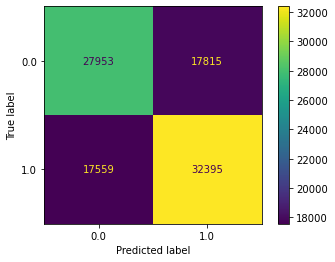

In [272]:
plot_confusion_matrix(LogisticModel, X_test, y_test)  

### Significance tests

In [242]:
sw_deals_win = sw_deals[sw_deals["WON"]==1]
sw_deals_lose = sw_deals[sw_deals["WON"]==0]
sw_deals_win[['PART_QTY', 'QUOTE_PRICE', 'ENTITLED_PRICE',
       'EXCHANGE_RATE','SUBMIT_YR']].describe()

,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,EXCHANGE_RATE,SUBMIT_YR
count,2.487360e+05,2.487360e+05,2.487360e+05,248736.000000,248736.000000
mean,7.549056e+04,3.746404e+04,8.829402e+05,0.975520,2020.058693
std,8.211152e+06,1.914619e+05,5.620794e+07,0.068917,0.955786
min,1.000000e+00,0.000000e+00,0.000000e+00,0.767460,2019.000000
25%,1.000000e+00,1.130780e+03,1.713007e+03,1.000000,2019.000000
50%,9.000000e+00,4.862805e+03,7.560056e+03,1.000000,2020.000000
75%,1.500000e+02,2.019108e+04,3.400268e+04,1.000000,2021.000000
max,1.000000e+09,1.825082e+07,1.619846e+10,1.000000,2022.000000


In [241]:
sw_deals_lose[['PART_QTY', 'QUOTE_PRICE', 'ENTITLED_PRICE',
       'EXCHANGE_RATE','SUBMIT_YR']].describe()

,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,EXCHANGE_RATE,SUBMIT_YR
count,2.298720e+05,2.298720e+05,2.298720e+05,229872.000000,229872.000000
mean,1.683589e+04,1.133097e+05,4.878221e+05,0.975624,2020.137198
std,3.648888e+06,3.857290e+06,4.349232e+07,0.068737,1.016118
min,0.000000e+00,0.000000e+00,0.000000e+00,0.767460,2019.000000
25%,1.000000e+00,1.320000e+03,1.968000e+03,1.000000,2019.000000
50%,8.000000e+00,6.574952e+03,9.900569e+03,1.000000,2020.000000
75%,1.500000e+02,2.932000e+04,4.773600e+04,1.000000,2021.000000
max,1.000000e+09,5.846750e+08,1.882648e+10,1.000000,2022.000000


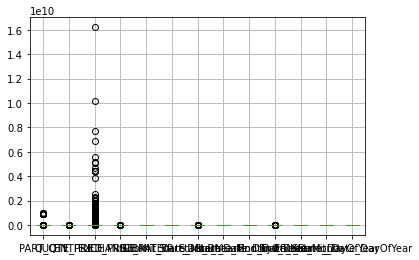

In [265]:
continuouscolumns = ['PART_QTY', 'QUOTE_PRICE', 'ENTITLED_PRICE',
       'EXCHANGE_RATE','SUBMIT_YR', 'Submit_Date_Month',
       'Start_Date_Year', 'Start_Date_Month', 'Start_Date_DayOfYear',
       'End_Date_Year', 'End_Date_Month', 'End_Date_DayOfYear', 'Submit_Date_DayOfYear'] #add time data here
boxplotwins = sw_deals_win.boxplot(column=continuouscolumns)  


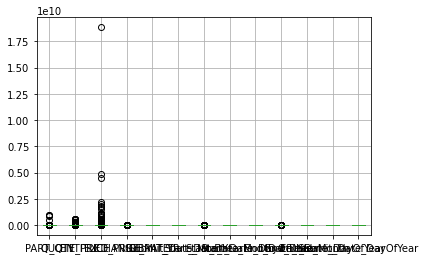

In [266]:
boxplotlosses = sw_deals_lose.boxplot(column=continuouscolumns)  


## T-tests

In [267]:
for column in continuouscolumns:
    t,p = stats.ttest_ind(sw_deals_win[column], sw_deals_lose[column], equal_var = False)
    print(column)
    print(p)

PART_QTY
0.0012215853437374095
QUOTE_PRICE
4.696462688713272e-21
ENTITLED_PRICE
0.00631249420124236
EXCHANGE_RATE
0.60300986989683
SUBMIT_YR
4.716255233892474e-166
Submit_Date_Month
2.6589856982433804e-95
Start_Date_Year
0.0
Start_Date_Month
0.012927016938498808
Start_Date_DayOfYear
0.00021046457227658793
End_Date_Year
0.0
End_Date_Month
6.141169382560313e-97
End_Date_DayOfYear
1.793742482939268e-102
Submit_Date_DayOfYear
5.625547654753137e-105


### Chi-square tests

PROD_CATEGORY 0.0
CNTRY_CODE 0.8321564106064112
CURRNCY_CODE 0.7191647801962642
INDUSTRY_CODE 0.0


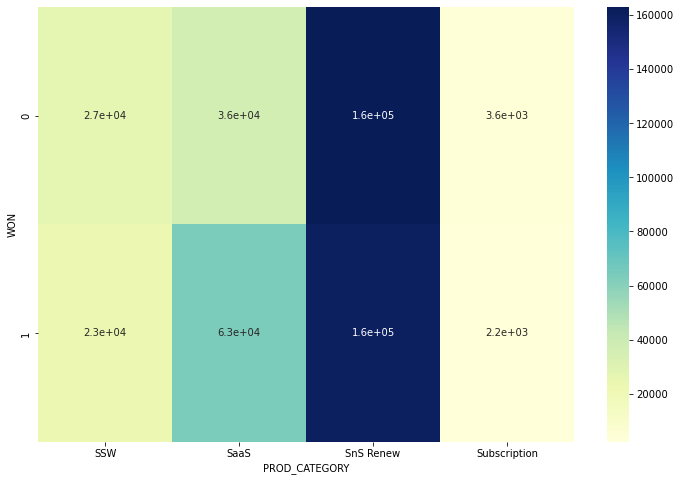

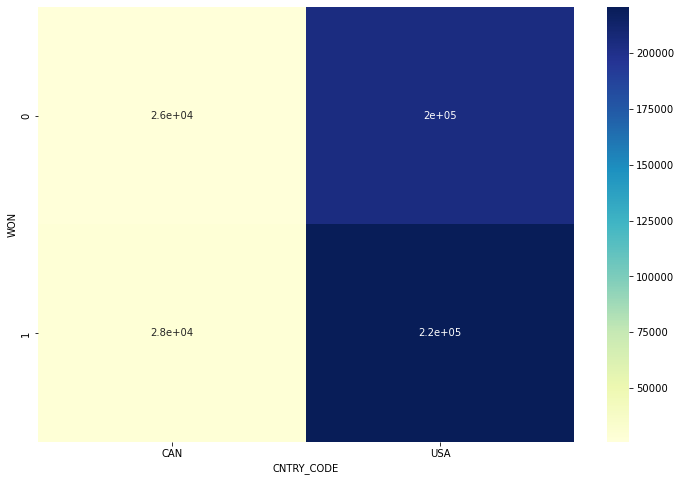

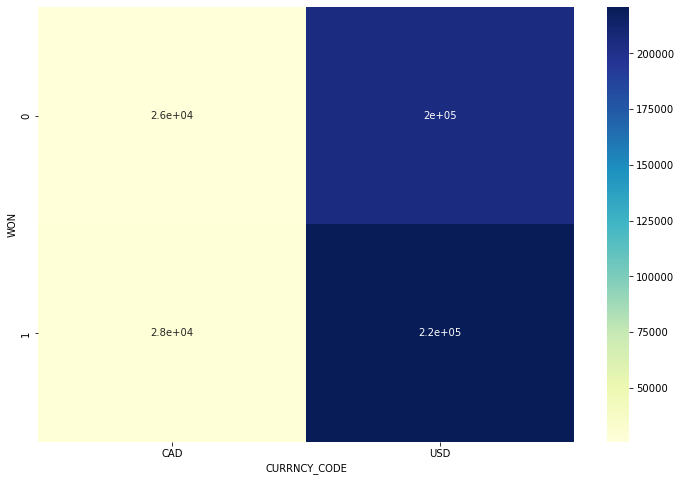

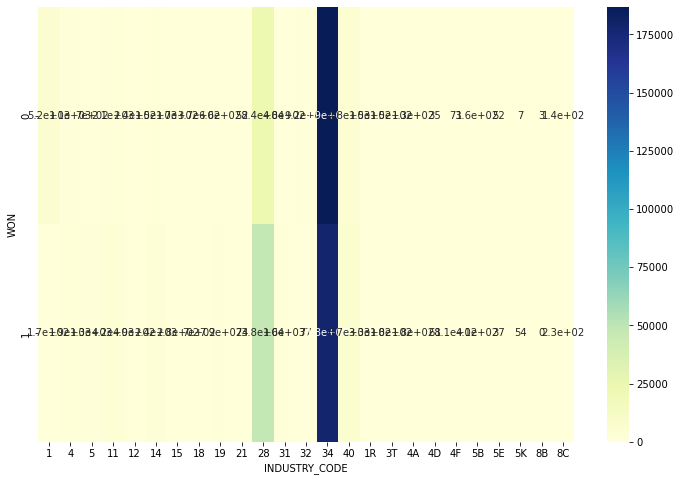

In [247]:
categorical_columns = ['PROD_CATEGORY', 'CNTRY_CODE','CURRNCY_CODE','INDUSTRY_CODE']
for column in categorical_columns:
    contigency= pd.crosstab(sw_deals['WON'], sw_deals[column]) 
    #print(contigency)
    c, p, dof, expected = chi2_contingency(contigency) 
    print(column, p)
    plt.figure(figsize=(12,8)) 
    sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [109]:
contigency= pd.crosstab(sw_deals['WON'], sw_deals['PROD_CATEGORY']) 
contigency

PROD_CATEGORY,SSW,SaaS,SnS Renew,Subscription
WON,,,,
0,26948,36265,163024,3635
1,23379,63154,160052,2151


### 2.1. Which product type has more competitors on an average? Explain why, both from data and business perspectives, clearly stating your assumptions.

In [123]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478608 entries, 0 to 478607
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PROD_CATEGORY   478608 non-null  object        
 1   WEB_QUOTE_NUM   478608 non-null  int64         
 2   CUSTOMER_NUM    478608 non-null  object        
 3   WON             478608 non-null  int64         
 4   CNTRY_CODE      478608 non-null  object        
 5   PART_NUM        478608 non-null  object        
 6   PART_QTY        478608 non-null  int64         
 7   QUOTE_PRICE     478608 non-null  float64       
 8   ENTITLED_PRICE  478608 non-null  float64       
 9   SUBMIT_DATE     478608 non-null  datetime64[ns]
 10  EXCHANGE_RATE   478608 non-null  float64       
 11  CURRNCY_CODE    478608 non-null  object        
 12  START_DATE      478608 non-null  datetime64[ns]
 13  END_DATE        478608 non-null  datetime64[ns]
 14  INDUSTRY_CODE   478608 non-null  obj

### Adding features for comments

### <span style='color:green'> Assumption: Deals having no comments have 0 competitors. </span>

In [193]:
joined["COMMENT_broken"] = joined["COMMENT"].apply(breakDownCompanies)
joined["COMMENT_count"] = joined["COMMENT"].apply(commentCount)

In [196]:
joined["COMMENT_count"].value_counts()

0    457344
1     21264
Name: COMMENT_count, dtype: int64

In [282]:
joined[joined["COMMENT_count"]!=0]

,PROD_CATEGORY,WEB_QUOTE_NUM,CUSTOMER_NUM,WON,CNTRY_CODE,PART_NUM,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,SUBMIT_DATE,...,END_DATE,INDUSTRY_CODE,SUBMIT_YR,INDUSTRY_DESC,CMMT_TYPE,COMMENT,ADD_DATE,MOD_DATE,COMMENT_broken,COMMENT_count
41,SSW,1090094412,3048106,0,CAN,DET0NLL,4,171345.080583,695846.508058,2022-05-19 11:39:32,...,2023-05-31 00:00:00,28,2022,Government,COMP_NAME,OpenText,2022-05-19 11:35:10,2022-05-19 11:39:17,1,1
80,SSW,1070028743,3066482,1,CAN,DM502ZX,182,320937.375288,697689.946278,2022-03-21 22:00:29,...,2023-03-31 00:00:00,28,2022,Government,COMP_NAME,SailPoint,2022-03-21 21:56:43,2022-03-21 21:59:22,1,1
87,SSW,1100094809,3079725,0,CAN,DVI1XLL,76,50967.828089,158649.270913,2022-06-15 15:58:22,...,2023-06-30 00:00:00,28,2022,Government,COMP_NAME,EMC - Rubrik,2022-06-15 15:57:37,2022-06-15 15:57:55,2,1
88,SSW,1100094809,3079725,0,CAN,DVI1ULL,100,75066.001535,231542.594014,2022-06-15 15:58:22,...,2023-06-30 00:00:00,28,2022,Government,COMP_NAME,EMC - Rubrik,2022-06-15 15:57:37,2022-06-15 15:57:55,2,1
89,SSW,10447678,3084241,0,CAN,DCY1TLL,100,147122.026094,326937.835764,2021-09-01 20:06:50,...,2022-09-30 00:00:00,28,2021,Government,COMP_NAME,Palintir/DataWalk,2021-09-01 20:05:36,2021-09-01 20:05:36,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478530,SaaS,1090051427,4187189,0,CAN,D2U1CLL,27550,11933.337600,12695.040000,2022-05-09 00:00:00,...,2022-11-07 22:30:16,34,2022,Small And Medium Business,COMP_NAME,Microsoft,2022-05-09 10:24:40,2022-05-09 10:29:42,1,1
478563,SaaS,1090066391,3519171,0,CAN,DWS1CLL,20,216152.064000,360253.440000,2022-05-17 00:00:00,...,2025-05-16 11:37:35,28,2022,Government,COMP_NAME,Microsoft,2022-05-17 08:50:53,2022-05-17 11:36:21,1,1
478574,Subscription,1090069896,3243840,0,CAN,DA62WLL,1,101807.308800,254518.272000,2022-05-13 00:00:00,...,2023-05-13 11:17:37,28,2022,Government,COMP_NAME,Microsoft,2022-05-13 11:11:45,2022-05-13 11:11:45,1,1
478575,Subscription,1090069896,3243840,0,CAN,DB62ELL,1,8644.608000,21611.520000,2022-05-13 00:00:00,...,2023-05-13 11:17:37,28,2022,Government,COMP_NAME,Microsoft,2022-05-13 11:11:45,2022-05-13 11:11:45,1,1


In [273]:
groupedByProductType = joined.groupby("PROD_CATEGORY").sum()
groupedByProductType.sort_values(by = "COMMENT_broken", ascending= False)

,WEB_QUOTE_NUM,WON,PART_QTY,QUOTE_PRICE,ENTITLED_PRICE,EXCHANGE_RATE,SUBMIT_YR,COMMENT_broken,COMMENT_count
PROD_CATEGORY,,,,,,,,,
SnS Renew,55033123924934,160052,513268217,2.187326e+10,5.005857e+10,314533.147000,652642902,12569,8261
SSW,7867573453058,23379,27901546,4.120924e+09,1.432847e+10,49045.297893,101663319,10799,6799
SaaS,15131222931487,63154,22103221039,6.472721e+09,2.512687e+11,97666.107000,200835387,8713,5530
Subscription,1847392373640,2151,2928768,2.898490e+09,1.609994e+10,5671.053000,11692689,889,674


### SnS had the largest revenue in 2021, so it's consistent with business logic that it had lot more competition

### T-test to check if number of competitors is significant

In [201]:
joined_win = joined[sw_deals["WON"]==1]
joined_lose = joined[sw_deals["WON"]==0]

t,p = stats.ttest_ind(joined_win["COMMENT_broken"], joined_lose["COMMENT_broken"], equal_var = False)
print(p)

0.0


### <span style='color:green'> -> Number of competitors is significant </span>

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


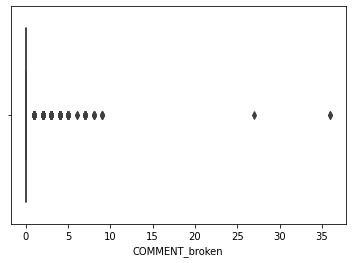

In [204]:
boxplotwins = sns.boxplot(joined_win["COMMENT_broken"])  

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


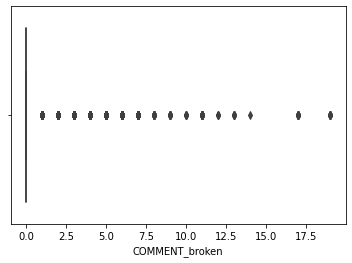

In [205]:
boxplotwins = sns.boxplot(joined_lose["COMMENT_broken"])  

### Number of comments with win/loss

COMMENT_broken      0      1     2     3    4    5   6   7   8   9   10  11  \
WON                                                                           
0               214819  10266  2620  1146  398  426  51  57  16  12   6  21   
1               242525   4819   804   472   60   21   2  19   6   5   0   0   

COMMENT_broken  12  13  14  17  19  27  36  
WON                                         
0                4   7   1  12  10   0   0  
1                0   0   0   0   0   1   2  


<AxesSubplot:xlabel='COMMENT_broken', ylabel='WON'>

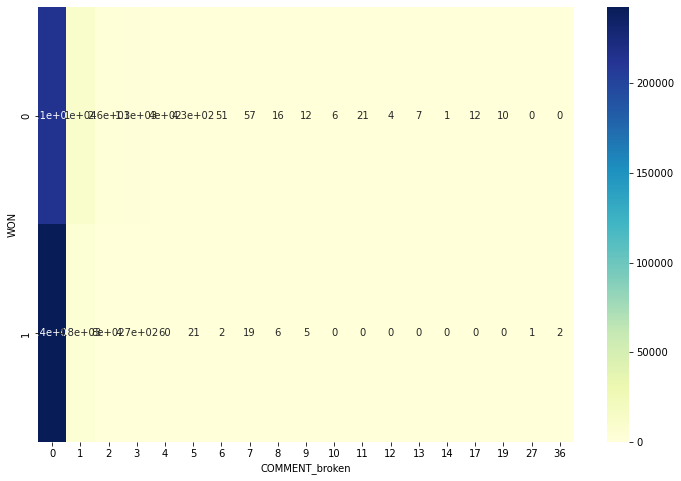

In [209]:
contigency= pd.crosstab(joined['WON'], joined["COMMENT_broken"]) 
print(contigency)
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [218]:
joined["COMMENT_broken"]
comment_transformed_data = (joined["COMMENT_broken"] - joined["COMMENT_broken"].min()) / (joined["COMMENT_broken"].max() - joined["COMMENT_broken"].min())
comment_transformed_data


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
478603    0.0
478604    0.0
478605    0.0
478606    0.0
478607    0.0
Name: COMMENT_broken, Length: 478608, dtype: float64

### Performing logistic regression with the number of comments

In [213]:
joined_numeric = list(['WON','PART_QTY', 'QUOTE_PRICE','SUBMIT_YR', 'Submit_Date_Month',
       'Start_Date_Year', 'Start_Date_DayOfYear',
       'End_Date_Year', 'End_Date_DayOfYear', 'Government',
       'Healthcare', 'Small And Medium Business', 'Education', 'Banking',
       'Unassigned', 'Commercial', 'To Be Assigned', 'Travel & Transportation',
       'Computer Services', 'Media And Entertainment',
       'Computer Integrated Systems Design', 'Aerospace And Defense',
       'Energy & Utilities', 'Consumer Packaged Goods', 'Industrial Products',
       'Insurance', 'Chemical And Petroleum', 'Retail', 'Telecommunications',
       'Life Science Industries', 'Financial Markets', 'Automotive',
       'Electronics', 'BP Activity end user not known', 'SSW', 'SnS Renew',
       'SaaS', 'Subscription', 'CAD',
       'Submit_Date_DayOfYear','COMMENT_broken'])

In [219]:
X["comments"]= comment_transformed_data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
LogisticModel = LogisticRegressionCV(cv=10).fit(X_train, y_train)

y_pred = LogisticModel.predict(X_test)
print(LogisticModel.coef_)
print(roc_auc_score(Y, LogisticModel.predict(X)))

/var/folders/k_/ppnmkyj13nvc74dj067xh0m40000gn/T/ipykernel_72923/2455372883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["comments"]= comment_transformed_data
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.o

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

[[ 1.54434257e+00 -1.63939714e+01  1.28452936e+00 -1.36845908e+00
  -3.34958265e+00 -4.24777247e-01 -2.39478571e+00  2.77248858e-02
   6.67061640e-01  6.58230557e-01 -2.14842269e-01  3.30921734e-01
   3.55443080e-01  5.09320741e-04 -2.57134959e+00 -3.67950212e+00
   7.54379858e-03  6.20189541e-01  3.13882474e-01  1.78103581e+00
   6.23937041e-01  4.01433955e-01  4.67815521e-01  3.16595426e-01
   9.57966443e-01  2.14487380e-01  5.91762873e-01 -3.42500752e-01
   1.84042135e-01  5.09085336e-02  1.64720423e-01 -5.88032451e-01
  -1.26590855e+00 -1.75236653e-01 -5.45037041e-02  7.03919007e-01
  -4.27826694e-01 -3.14239698e-02  2.08932232e+00 -1.57319178e+01]]
0.6253748188678669


/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### <span style='color:green'> -> The score improved! </span>

### Performing Random Forests with the number of comments

In [279]:
X["comments"]= comment_transformed_data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
randomForestClassifierModel = RandomForestClassifier(n_estimators=100, max_depth=50)
randomForestClassifierModel.fit(X, Y)
randomForestClassifierModel.score(X_test, y_test)

/var/folders/k_/ppnmkyj13nvc74dj067xh0m40000gn/T/ipykernel_72923/1882215222.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForestClassifierModel.fit(X, Y)


0.9700382357242849

### <span style='color:green'> -> The score improved! </span>

In [236]:
randomForestClassifierModel.feature_importances_

array([4.50395724e-02, 1.41470082e-01, 7.32062764e-02, 4.49669695e-03,
       3.49387942e-02, 6.17447659e-02, 2.71130252e-02, 3.80733024e-02,
       8.97303464e-02, 3.27183864e-02, 3.59951815e-02, 7.11774078e-02,
       1.65357161e-02, 2.32080841e-03, 1.57809100e-02, 3.07399166e-03,
       1.54228062e-03, 1.63211558e-04, 2.04879678e-03, 1.18951493e-02,
       7.75975841e-04, 3.81834291e-04, 1.11563828e-03, 6.48673716e-05,
       2.05430742e-03, 4.24615317e-04, 6.32596842e-04, 8.74668786e-05,
       1.11307550e-03, 3.51374340e-04, 2.92453350e-04, 2.42571893e-04,
       2.27650872e-04, 1.26496574e-04, 1.89996603e-04, 7.89186814e-05,
       2.59680718e-07, 5.53840641e-03, 1.23309701e-02, 1.77255849e-02,
       1.80372625e-03, 1.83603604e-03, 1.91693878e-03, 1.76152466e-03,
       1.78584338e-03, 2.23997485e-01, 1.40786837e-02])

/Users/palakbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


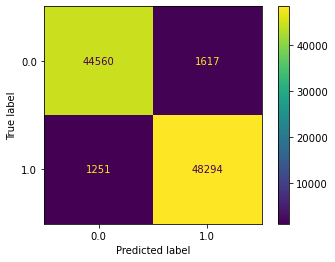

In [280]:
plot_confusion_matrix(randomForestClassifierModel, X_test, y_test)  